<a href="https://cognitiveclass.ai"><img src = "colombian-food.jpg" width = 400> </a>

<h1 align=center><font size = 5>The Battle of Neighborhoods - Colombia Mágica in New York</font></h1>

## Download all the dependencies that we will need

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import requests
import urllib.request
import bs4 as bs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import requests # library to handle requests
import json # library to handle JSON files
import folium # map rendering library

from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.cluster import KMeans
from urllib.parse import urlparse

%matplotlib inline
print('Libraries imported.')

Libraries imported.


##  Load and explore the data

In [2]:
stat = pd.read_excel("hispanic-population-by-state-us-2018.xlsx", sheet_name="Data")
stat.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,"Hispanic population, by state U.S. 2018",NaN
2,NaN,Hispanic population of the United States in 20...,NaN
3,NaN,NaN,NaN
4,NaN,California,15540.0
5,NaN,Texas,11369.0
6,NaN,Florida,5562.0
7,NaN,New York,3753.0
8,NaN,Arizona,2266.0
9,NaN,Illinois,2209.0


In [3]:
stat1 = stat[["Unnamed: 1", "Unnamed: 2"]]
stat1.head()

,Unnamed: 1,Unnamed: 2
0,NaN,NaN
1,"Hispanic population, by state U.S. 2018",NaN
2,Hispanic population of the United States in 20...,NaN
3,NaN,NaN
4,California,15540.0


In [4]:
stat2 = stat1.drop([0,1,2,3,], axis=0)
stat2.head()

,Unnamed: 1,Unnamed: 2
4,California,15540.0
5,Texas,11369.0
6,Florida,5562.0
7,New York,3753.0
8,Arizona,2266.0


In [5]:
stat2.reset_index(drop=True, inplace=True)
stat2.head()

,Unnamed: 1,Unnamed: 2
0,California,15540.0
1,Texas,11369.0
2,Florida,5562.0
3,New York,3753.0
4,Arizona,2266.0


In [6]:
stat2.rename(columns={'Unnamed: 1': 'state',
                      'Unnamed: 2': 'hispanic_population'}, inplace=True)
stat2.head()

,state,hispanic_population
0,California,15540.0
1,Texas,11369.0
2,Florida,5562.0
3,New York,3753.0
4,Arizona,2266.0


In [7]:
stat2.at[3, 'hispanic_population']

3753.0

In [8]:
stat3 = stat2.set_index('state')
stat3.head()

,hispanic_population
state,
California,15540.0
Texas,11369.0
Florida,5562.0
New York,3753.0
Arizona,2266.0


In [9]:
all(isinstance(column, str) for column in stat2.columns)

True

In [10]:
print ('data dimensions:', stat2.shape)

data dimensions: (51, 2)


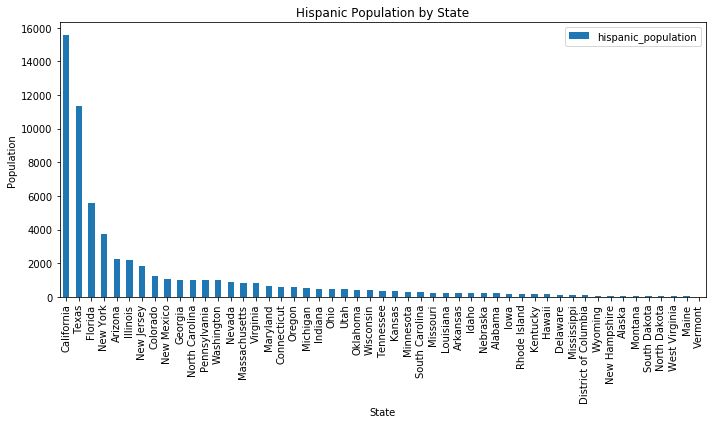

In [11]:
stat3.plot(kind='bar', figsize=(10, 6))

plt.xlabel('State') # add to x-label to the plot
plt.ylabel('Population') # add y-label to the plot
plt.title('Hispanic Population by State') # add title to the plot

plt.tight_layout()
plt.savefig('Hispanic population by State', dpi=300)

plt.show()

## Load and explore the second data

In [12]:
NY_State = pd.read_excel("NY_State.xlsx")
NY_State.head(10)

,table with row headers in column A and column headers in rows 3 through 4 (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Annual Estimates of the Resident Population fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geographic Area,2010-04-01 00:00:00,NaN,Population Estimate (as of July 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Census,Estimates Base,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
3,New York,19378102,19378144,19399878,19499241.0,19572932.0,19624447.0,19651049.0,19654666.0,19633428.0,19589572.0,19530351.0,19453561.0
4,".Albany County, New York",304204,304208,304086,304596.0,305723.0,306589.0,307151.0,307433.0,307597.0,307717.0,306585.0,305506.0
5,".Allegany County, New York",48946,48923,48971,48800.0,48210.0,47900.0,47652.0,47334.0,47044.0,46639.0,46332.0,46091.0
6,".Bronx County, New York",1385108,1384580,1387298,1397335.0,1411496.0,1421928.0,1430942.0,1440005.0,1444417.0,1440625.0,1432087.0,1418207.0
7,".Broome County, New York",200600,200675,200481,199363.0,198667.0,197914.0,197251.0,195928.0,194498.0,193100.0,191925.0,190488.0
8,".Cattaraugus County, New York",80317,80337,80218,79815.0,79348.0,78996.0,78677.0,77926.0,77658.0,77176.0,76726.0,76117.0
9,".Cayuga County, New York",80026,80008,79895,79693.0,79505.0,79088.0,78762.0,78298.0,77674.0,77457.0,77121.0,76576.0


In [13]:
state = NY_State[["table with row headers in column A and column headers in rows 3 through 4 (leading dots indicate sub-parts)",
                 "Unnamed: 12"]]
state

,table with row headers in column A and column headers in rows 3 through 4 (leading dots indicate sub-parts),Unnamed: 12
0,Annual Estimates of the Resident Population fo...,NaN
1,Geographic Area,NaN
2,NaN,2019.0
3,New York,19453561.0
4,".Albany County, New York",305506.0
...,...,...
66,Note: The estimates are based on the 2010 Cens...,NaN
67,Suggested Citation:,NaN
68,Annual Estimates of the Resident Population fo...,NaN
69,"Source: U.S. Census Bureau, Population Division",NaN


In [14]:
state.rename(columns={'table with row headers in column A and column headers in rows 3 through 4 (leading dots indicate sub-parts)': 'county',
                     'Unnamed: 12': 'population'}, inplace=True)
state.head(10)

/Users/williamoliss/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,county,population
0,Annual Estimates of the Resident Population fo...,NaN
1,Geographic Area,NaN
2,NaN,2019.0
3,New York,19453561.0
4,".Albany County, New York",305506.0
5,".Allegany County, New York",46091.0
6,".Bronx County, New York",1418207.0
7,".Broome County, New York",190488.0
8,".Cattaraugus County, New York",76117.0
9,".Cayuga County, New York",76576.0


In [15]:
state.tail(10)

,county,population
61,".Washington County, New York",61204.0
62,".Wayne County, New York",89918.0
63,".Westchester County, New York",967506.0
64,".Wyoming County, New York",39859.0
65,".Yates County, New York",24913.0
66,Note: The estimates are based on the 2010 Cens...,NaN
67,Suggested Citation:,NaN
68,Annual Estimates of the Resident Population fo...,NaN
69,"Source: U.S. Census Bureau, Population Division",NaN
70,Release Date: March 2020,NaN


In [16]:
state1 = state.drop([0,1,2,3,66,67,68,69,70], axis=0)
state1

,county,population
4,".Albany County, New York",305506.0
5,".Allegany County, New York",46091.0
6,".Bronx County, New York",1418207.0
7,".Broome County, New York",190488.0
8,".Cattaraugus County, New York",76117.0
...,...,...
61,".Washington County, New York",61204.0
62,".Wayne County, New York",89918.0
63,".Westchester County, New York",967506.0
64,".Wyoming County, New York",39859.0


In [17]:
state2 = state1.set_index('county')
state2

,population
county,
".Albany County, New York",305506.0
".Allegany County, New York",46091.0
".Bronx County, New York",1418207.0
".Broome County, New York",190488.0
".Cattaraugus County, New York",76117.0
...,...
".Washington County, New York",61204.0
".Wayne County, New York",89918.0
".Westchester County, New York",967506.0


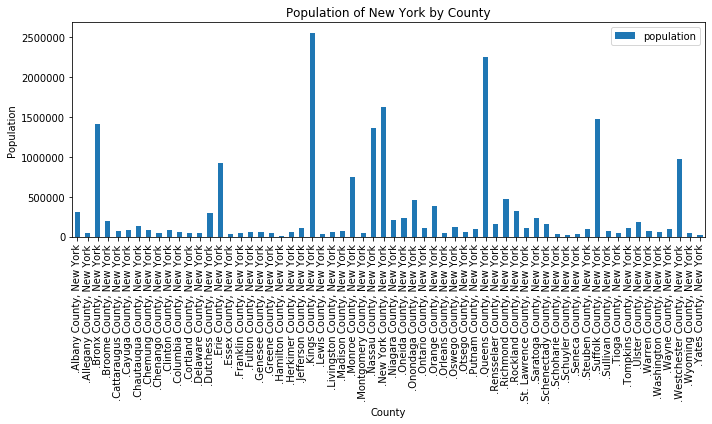

In [18]:
state2.plot(kind='bar', figsize=(10, 6))

plt.xlabel('County') # add to x-label to the plot
plt.ylabel('Population') # add y-label to the plot
plt.title('Population of New York by County') # add title to the plot

plt.tight_layout()
plt.savefig('Population of New York by County', dpi=300)

plt.show()

## Load and explore the third data

In [19]:
Kings = pd.read_csv("Kings_County.csv")
Kings.head(10)

,Fact,Fact Note,"Kings County (Brooklyn Borough), New York","Value Note for Kings County (Brooklyn Borough), New York"
0,"Population estimates, July 1, 2019, (V2019)",NaN,"2,559,903",NaN
1,"Population estimates base, April 1, 2010, (V2...",NaN,"2,504,721",NaN
2,"Population, percent change - April 1, 2010 (es...",NaN,2.2%,NaN
3,"Population, Census, April 1, 2010",NaN,"2,504,700",NaN
4,"Persons under 5 years, percent",NaN,7.1%,NaN
5,"Persons under 18 years, percent",NaN,22.7%,NaN
6,"Persons 65 years and over, percent",NaN,14.4%,NaN
7,"Female persons, percent",NaN,52.6%,NaN
8,"White alone, percent",NaN,49.8%,NaN
9,"Black or African American alone, percent",(a),33.8%,NaN


In [20]:
Kings1 = Kings[['Fact', 'Kings County (Brooklyn Borough), New York']]
Kings1

,Fact,"Kings County (Brooklyn Borough), New York"
0,"Population estimates, July 1, 2019, (V2019)","2,559,903"
1,"Population estimates base, April 1, 2010, (V2...","2,504,721"
2,"Population, percent change - April 1, 2010 (es...",2.2%
3,"Population, Census, April 1, 2010","2,504,700"
4,"Persons under 5 years, percent",7.1%
...,...,...
78,N,NaN
79,NaN,NaN
80,S,NaN
81,X,NaN


In [21]:
Kings2 = Kings1.loc[(Kings1['Fact'] == 'Hispanic or Latino, percent') 
                          | (Kings1['Fact'] == 'Population estimates, July 1, 2019,  (V2019)')]
Kings2

,Fact,"Kings County (Brooklyn Borough), New York"
0,"Population estimates, July 1, 2019, (V2019)","2,559,903"
14,"Hispanic or Latino, percent",18.9%


In [22]:
Kings2.rename(columns={'Kings County (Brooklyn Borough), New York': 'kings_county'},
             inplace=True)
Kings2

/Users/williamoliss/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Fact,kings_county
0,"Population estimates, July 1, 2019, (V2019)","2,559,903"
14,"Hispanic or Latino, percent",18.9%


In [23]:
Kings2.reset_index(drop=True, inplace=True)
Kings2

,Fact,kings_county
0,"Population estimates, July 1, 2019, (V2019)","2,559,903"
1,"Hispanic or Latino, percent",18.9%


In [24]:
def percent(expression):
    if "%" in expression:
        expression = expression.replace("%","/100")
    return eval(expression)

In [25]:
percent("2559903*18.9%")

483821.66699999996

In [26]:
round(483821.66699999996)

483822

In [27]:
Kings2.at[1, 'kings_county'] = 483822
Kings2

,Fact,kings_county
0,"Population estimates, July 1, 2019, (V2019)","2,559,903"
1,"Hispanic or Latino, percent",483822


In [28]:
# Change to numeric value
Kings2.at[0, 'kings_county'] = 2559903
Kings2

,Fact,kings_county
0,"Population estimates, July 1, 2019, (V2019)",2559903
1,"Hispanic or Latino, percent",483822


In [29]:
Kings2.index = ['total_population', 'hispanic_latino'] 
Kings2

,Fact,kings_county
total_population,"Population estimates, July 1, 2019, (V2019)",2559903
hispanic_latino,"Hispanic or Latino, percent",483822


In [30]:
Kings3 = Kings2.drop(columns=["Fact"])
Kings3

,kings_county
total_population,2559903
hispanic_latino,483822


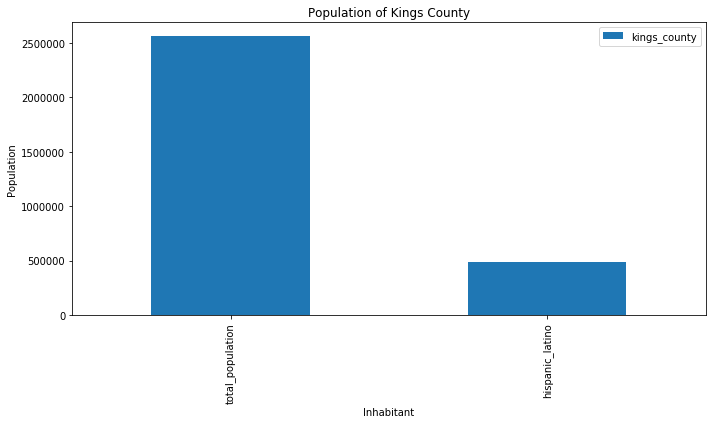

In [31]:
Kings3.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Inhabitant') # add to x-label to the plot
plt.ylabel('Population') # add y-label to the plot
plt.title('Population of Kings County') # add title to the plot

plt.tight_layout()
plt.savefig('Population of Kings County', dpi=300)

plt.show()

## Load and explore the fourth data

In [32]:
Queens = pd.read_csv("Queens_County.csv")
Queens.head(10)

,Fact,Fact Note,"Queens County (Queens Borough), New York","Value Note for Queens County (Queens Borough), New York"
0,"Population estimates, July 1, 2019, (V2019)",NaN,"2,253,858",NaN
1,"Population estimates base, April 1, 2010, (V2...",NaN,"2,230,619",NaN
2,"Population, percent change - April 1, 2010 (es...",NaN,1.0%,NaN
3,"Population, Census, April 1, 2010",NaN,"2,230,722",NaN
4,"Persons under 5 years, percent",NaN,6.1%,NaN
5,"Persons under 18 years, percent",NaN,20.0%,NaN
6,"Persons 65 years and over, percent",NaN,16.3%,NaN
7,"Female persons, percent",NaN,51.5%,NaN
8,"White alone, percent",NaN,47.8%,NaN
9,"Black or African American alone, percent",(a),20.7%,NaN


In [33]:
Queens1 = Queens[['Fact', 'Queens County (Queens Borough), New York']]
Queens1

,Fact,"Queens County (Queens Borough), New York"
0,"Population estimates, July 1, 2019, (V2019)","2,253,858"
1,"Population estimates base, April 1, 2010, (V2...","2,230,619"
2,"Population, percent change - April 1, 2010 (es...",1.0%
3,"Population, Census, April 1, 2010","2,230,722"
4,"Persons under 5 years, percent",6.1%
...,...,...
78,N,NaN
79,NaN,NaN
80,S,NaN
81,X,NaN


In [34]:
Queens2 = Queens1.loc[(Queens1['Fact'] == 'Hispanic or Latino, percent') 
                          | (Queens1['Fact'] == 'Population estimates, July 1, 2019,  (V2019)')]
Queens2

,Fact,"Queens County (Queens Borough), New York"
0,"Population estimates, July 1, 2019, (V2019)","2,253,858"
14,"Hispanic or Latino, percent",28.2%


In [35]:
Queens2.rename(columns={'Queens County (Queens Borough), New York': 'queens_county'},
             inplace=True)
Queens2

/Users/williamoliss/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Fact,queens_county
0,"Population estimates, July 1, 2019, (V2019)","2,253,858"
14,"Hispanic or Latino, percent",28.2%


In [36]:
Queens2.reset_index(drop=True, inplace=True)
Queens2

,Fact,queens_county
0,"Population estimates, July 1, 2019, (V2019)","2,253,858"
1,"Hispanic or Latino, percent",28.2%


In [37]:
percent("2253858*28.2%")

635587.956

In [38]:
round(635587.956)

635588

In [39]:
Queens2.at[1, 'queens_county'] = 635588
Queens2

,Fact,queens_county
0,"Population estimates, July 1, 2019, (V2019)","2,253,858"
1,"Hispanic or Latino, percent",635588


In [40]:
# Change to numeric value
Queens2.at[0, 'queens_county'] = 2253858
Queens2

,Fact,queens_county
0,"Population estimates, July 1, 2019, (V2019)",2253858
1,"Hispanic or Latino, percent",635588


In [41]:
635588-483822

151766

In [42]:
Queens2.index = ['total_population', 'hispanic_latino'] 
Queens2

,Fact,queens_county
total_population,"Population estimates, July 1, 2019, (V2019)",2253858
hispanic_latino,"Hispanic or Latino, percent",635588


In [43]:
Queens3 = Queens2.drop(columns=["Fact"])
Queens3

,queens_county
total_population,2253858
hispanic_latino,635588


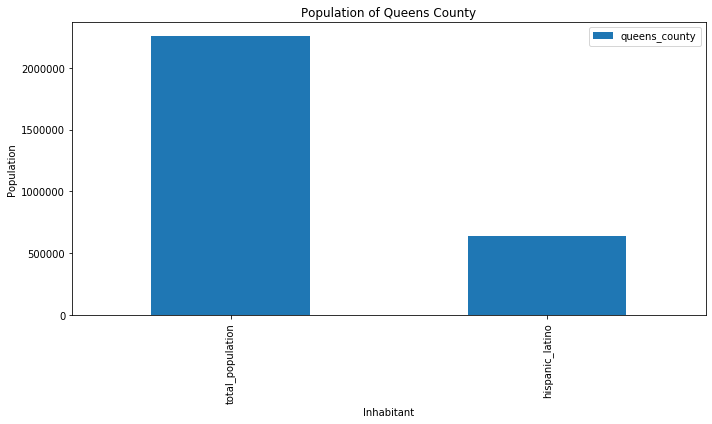

In [44]:
Queens3.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Inhabitant') # add to x-label to the plot
plt.ylabel('Population') # add y-label to the plot
plt.title('Population of Queens County') # add title to the plot

plt.tight_layout()
plt.savefig('Population of Queens County', dpi=300)

plt.show()

## Download and Explore Dataset

In [45]:
import wget

wget.download('https://cocl.us/new_york_dataset', 'newyork_data.json')
print('Data downloaded!')

Data downloaded!


In [46]:
with open('newyork_data.json') as json_data: 
    newyork_data = json.load(json_data)

In [47]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [48]:
neighborhoods_data = newyork_data['features']

In [49]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

### Tranform the data into a pandas dataframe

In [50]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']
       # instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [51]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [52]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
    
    neighborhood_latlon = data['geometry']['coordinates'] 
    neighborhood_lat = neighborhood_latlon[1] 
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough, 
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True
                                        )

In [53]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [54]:
neighborhoods.shape

(306, 4)

### Use geopy library to get the latitude and longitude values of New York City

In [55]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer") 
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of New York City are {}, {}.'.format(latitude, longitude 
                                                                      ))

The geographical coordinate of New York City are 40.7127281, -74.0060152.


In [56]:
queens_data = neighborhoods[neighborhoods['Borough'] == 'Queens'].reset_index(drop=True)
queens_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


In [57]:
address = 'Queens, NY'

geolocator = Nominatim(user_agent="ny_explorer") 
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Queens are {}, {}.'.format(latitude, longitude))

The geographical coordinate of Queens are 40.7498243, -73.7976337.


### Create a map of Queens with neighborhoods

In [58]:
map_queens = folium.Map(location=[latitude, longitude], zoom_start=11)


for lat, lng, label in zip(queens_data['Latitude'], queens_data['Longitude'], queens_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True) 
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue').add_to(map_queens)
    
map_queens

### Define Foursquare Credentials and Version

In [59]:
CLIENT_ID = '2PRCQUSUKZK3FXJZB2Z02RYFWKCWU3SLEQCMBBEPODGCMAX4' # my Foursquare ID
CLIENT_SECRET = 'DT15KOBNMOXKHIC0Y2KDWIOBSIMSNOBAH54XMG4TPJEY2KQ1' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2PRCQUSUKZK3FXJZB2Z02RYFWKCWU3SLEQCMBBEPODGCMAX4
CLIENT_SECRET:DT15KOBNMOXKHIC0Y2KDWIOBSIMSNOBAH54XMG4TPJEY2KQ1


In [60]:
queens_data.loc[0, 'Neighborhood']

'Astoria'

In [61]:
neighborhood_latitude = queens_data.loc[0, 'Latitude'] 
neighborhood_longitude = queens_data.loc[0, 'Longitude'] 
neighborhood_name = queens_data.loc[0, 'Neighborhood'] 

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude,
                                                               neighborhood_longitude))

Latitude and longitude values of Astoria are 40.76850859335492, -73.91565374304234.


In [62]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=2PRCQUSUKZK3FXJZB2Z02RYFWKCWU3SLEQCMBBEPODGCMAX4&client_secret=DT15KOBNMOXKHIC0Y2KDWIOBSIMSNOBAH54XMG4TPJEY2KQ1&v=20180605&ll=40.76850859335492,-73.91565374304234&radius=500&limit=100'

In [63]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f39f09a82da01237ec6c1d9'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Astoria',
  'headerFullLocation': 'Astoria, Queens',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 102,
  'suggestedBounds': {'ne': {'lat': 40.773008597854925,
    'lng': -73.90972309237958},
   'sw': {'lat': 40.76400858885492, 'lng': -73.9215843937051}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bdf502a89ca76b062b75d5e',
       'name': 'Favela Grill',
       'location': {'address': '33-18 28th Ave',
        'crossStreet': 'btwn 33rd & 34th St.',
        'lat': 40.76734843380796,
        'lng': -73.9178974

In [64]:
def get_category_type(row): 
    try:
        categories_list = row['categories'] 
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [65]:
venues = results['response']['groups'][0]['items'] 
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1) 

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns] 
nearby_venues.head()

,name,categories,lat,lng
0,Favela Grill,Brazilian Restaurant,40.767348,-73.917897
1,Orange Blossom,Gourmet Shop,40.769856,-73.917012
2,Simply Fit Astoria,Gym,40.769114,-73.912403
3,Titan Foods Inc.,Gourmet Shop,40.769198,-73.919253
4,CrossFit Queens,Gym,40.769404,-73.918977


In [66]:
nearby_venues.shape

(100, 4)

In [67]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [68]:
queens_venues = getNearbyVenues(names=queens_data['Neighborhood'],
                                   latitudes=queens_data['Latitude'],
                                   longitudes=queens_data['Longitude']
                                  )

Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cambria Heights
Rosedale
Far Rockaway
Broad Channel
Breezy Point
Steinway
Beechhurst
Bay Terrace
Edgemere
Arverne
Rockaway Beach
Neponsit
Murray Hill
Floral Park
Holliswood
Jamaica Estates
Queensboro Hill
Hillcrest
Ravenswood
Lindenwood
Laurelton
Lefrak City
Belle Harbor
Rockaway Park
Somerville
Brookville
Bellaire
North Corona
Forest Hills Gardens
Jamaica Hills
Utopia
Pomonok
Astoria Heights
Hunters Point
Sunnyside Gardens
Blissville
Roxbury
Middle Village
Malba
Hammels
Bayswater
Queensbridge


In [69]:
print(queens_venues.shape)
queens_venues.head()

(2078, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop
2,Astoria,40.768509,-73.915654,Simply Fit Astoria,40.769114,-73.912403,Gym
3,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop
4,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym


In [70]:
queens_venues.rename(columns={"Venue Category": "Venue_Category",
                             "Venue Latitude": "Venue_Lat",
                             "Venue Longitude": "Venue_Long"}, inplace=True)
queens_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop
2,Astoria,40.768509,-73.915654,Simply Fit Astoria,40.769114,-73.912403,Gym
3,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop
4,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym
...,...,...,...,...,...,...,...
2073,Queensbridge,40.756091,-73.945631,Queensbridge Basketball Courts,40.755060,-73.949103,Basketball Court
2074,Queensbridge,40.756091,-73.945631,The Ravel Hotel Gym,40.753787,-73.948815,Athletics & Sports
2075,Queensbridge,40.756091,-73.945631,Profundo Pool Club,40.753719,-73.948878,Hotel Pool
2076,Queensbridge,40.756091,-73.945631,Estate Garden And Grill,40.753700,-73.948841,Beer Garden


In [71]:
hispanic_venues = queens_venues.loc[queens_venues['Venue_Category'] == 'South American Restaurant']
hispanic_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
177,Jackson Heights,40.751981,-73.882821,El Chivito D' Oro,40.749833,-73.882376,South American Restaurant
179,Jackson Heights,40.751981,-73.882821,La Nueva Bakery,40.750134,-73.880227,South American Restaurant
215,Jackson Heights,40.751981,-73.882821,Pollos Mario #3,40.748220,-73.879639,South American Restaurant
244,Jackson Heights,40.751981,-73.882821,La Perrada de Chalo,40.755737,-73.883982,South American Restaurant
249,Jackson Heights,40.751981,-73.882821,Casa Colombia,40.748263,-73.879485,South American Restaurant
274,Elmhurst,40.744049,-73.881656,Pollos a la Brasa Mario,40.747659,-73.884806,South American Restaurant
320,Corona,40.742382,-73.856825,El Palacio De Las Empanadas,40.742674,-73.854700,South American Restaurant
370,Kew Gardens,40.705179,-73.829819,Tu Casa Restaurant,40.706113,-73.831586,South American Restaurant
581,Sunnyside,40.740176,-73.926916,I Love Paraguay,40.741087,-73.921490,South American Restaurant
589,Sunnyside,40.740176,-73.926916,La Pollera Colorada,40.740247,-73.923419,South American Restaurant


In [72]:
venues = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(hispanic_venues['Venue_Lat'], hispanic_venues['Venue_Long'], hispanic_venues['Venue']):
    label = folium.Popup(label, parse_html=True) 
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue').add_to(venues)
    
venues

__Colombian restaurants:__
    * Tienda Vieja
    * Rico's Chicken
    * La Pollera Colorada
    * Pollos A La Brasa Mario
    * La Perrada De Chalo
    * La Nueva Bakery
    * Casa Colombia
    * Pollos Mario
    * Los Amigos Chimichurry
    * El Palacio de Las Empanadas

In [73]:
hispanic_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
Neighborhood,,,,,,
Corona,1,1,1,1,1,1
Elmhurst,1,1,1,1,1,1
Jackson Heights,5,5,5,5,5,5
Kew Gardens,1,1,1,1,1,1
Middle Village,1,1,1,1,1,1
North Corona,1,1,1,1,1,1
Sunnyside,2,2,2,2,2,2
Utopia,1,1,1,1,1,1


In [74]:
# one hot encoding
venues_onehot = pd.get_dummies(hispanic_venues[['Neighborhood']], prefix="", prefix_sep="")

# add venue_category column back to dataframe
venues_onehot['Venue_Category'] = hispanic_venues['Venue_Category'] 

# move venue_category column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]

venues_onehot

,Venue_Category,Corona,Elmhurst,Jackson Heights,Kew Gardens,Middle Village,North Corona,Sunnyside,Utopia
177,South American Restaurant,0,0,1,0,0,0,0,0
179,South American Restaurant,0,0,1,0,0,0,0,0
215,South American Restaurant,0,0,1,0,0,0,0,0
244,South American Restaurant,0,0,1,0,0,0,0,0
249,South American Restaurant,0,0,1,0,0,0,0,0
274,South American Restaurant,0,1,0,0,0,0,0,0
320,South American Restaurant,1,0,0,0,0,0,0,0
370,South American Restaurant,0,0,0,1,0,0,0,0
581,South American Restaurant,0,0,0,0,0,0,1,0
589,South American Restaurant,0,0,0,0,0,0,1,0


In [75]:
venues_onehot.shape

(13, 9)

In [76]:
venues_grouped = venues_onehot.groupby('Venue_Category').mean().reset_index()
venues_grouped

,Venue_Category,Corona,Elmhurst,Jackson Heights,Kew Gardens,Middle Village,North Corona,Sunnyside,Utopia
0,South American Restaurant,0.076923,0.076923,0.384615,0.076923,0.076923,0.076923,0.153846,0.076923


In [77]:
num_top_neighborhoods = 5

for hood in venues_grouped['Venue_Category']:
    print("----"+hood+"----")
    temp = venues_grouped[venues_grouped['Venue_Category'] == hood].T.reset_index()
    temp.columns = ['neighborhood','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_neighborhoods))
    print('\n')

----South American Restaurant----
      neighborhood  freq
0  Jackson Heights  0.38
1        Sunnyside  0.15
2           Corona  0.08
3         Elmhurst  0.08
4      Kew Gardens  0.08




In [78]:
def return_most_common_neighborhood(row, num_top_neighborhoods):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_neighborhoods]

In [79]:
num_top_neighborhoods = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top neighborhoods
columns = ['Venue_Category']
for ind in np.arange(num_top_neighborhoods):
    try:
        columns.append('{}{} Most Common Neighborhood'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Neighborhood'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Venue_Category'] = venues_grouped['Venue_Category']

for ind in np.arange(venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_neighborhood(venues_grouped.iloc[ind, :], num_top_neighborhoods)

neighborhoods_venues_sorted.head()

,Venue_Category,1st Most Common Neighborhood,2nd Most Common Neighborhood,3rd Most Common Neighborhood
0,South American Restaurant,Jackson Heights,Sunnyside,Utopia


In [81]:
common_neighborhood = queens_data.loc[(queens_data['Neighborhood'] == 'Jackson Heights')
                                      | (queens_data['Neighborhood'] == 'Sunnyside')
                                      | (queens_data['Neighborhood'] == 'Utopia')]
common_neighborhood

,Borough,Neighborhood,Latitude,Longitude
2,Queens,Jackson Heights,40.751981,-73.882821
11,Queens,Sunnyside,40.740176,-73.926916
69,Queens,Utopia,40.733500,-73.796717


In [82]:
common_neighborhoods = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(common_neighborhood['Latitude'], common_neighborhood['Longitude'], common_neighborhood['Neighborhood']):
    label = folium.Popup(label, parse_html=True) 
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue').add_to(common_neighborhoods)
    
common_neighborhoods